In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [18]:
train = pd.read_csv("csv/stats/mitbih_train.csv", header=None)
test = pd.read_csv("csv/stats/mitbih_test.csv", header=None)

fusion_df = pd.concat([train, test], ignore_index=True)

fusion_df.to_csv("mitbih_files.csv", index=False, header=False)


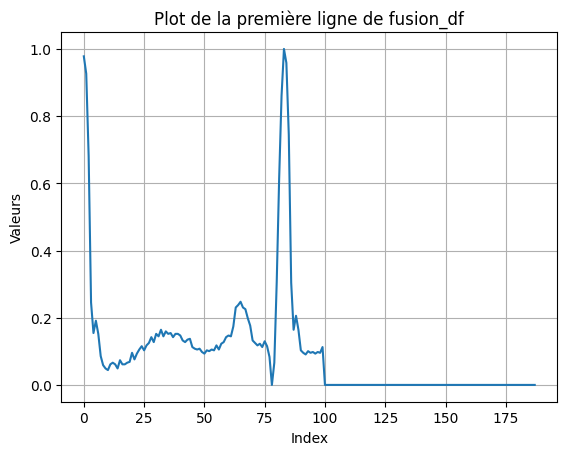

In [19]:
premiere_ligne = fusion_df.iloc[0]  

plt.plot(premiere_ligne)
plt.title("Plot de la première ligne de fusion_df")
plt.xlabel("Index")
plt.ylabel("Valeurs")
plt.grid(True)
plt.show()


In [20]:
fusion_df

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109441,0.928736,0.871264,0.804598,0.742529,0.650575,0.535632,0.394253,0.250575,0.140230,0.102299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
109442,0.802691,0.692078,0.587444,0.446936,0.318386,0.189836,0.118087,0.077728,0.112108,0.152466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
109443,1.000000,0.967359,0.620178,0.347181,0.139466,0.089021,0.103858,0.100890,0.106825,0.100890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
109444,0.984127,0.567460,0.607143,0.583333,0.607143,0.575397,0.575397,0.488095,0.392857,0.238095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


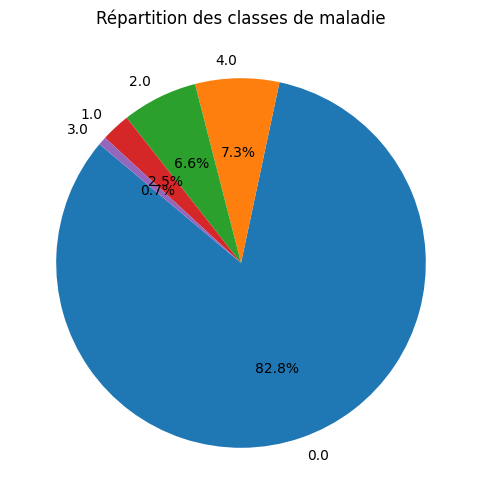

In [21]:
compte_classes = fusion_df[187].value_counts()

pourcentages_classes = (compte_classes / len(fusion_df)) * 100

plt.figure(figsize=(8, 6))  
plt.pie(compte_classes, labels=compte_classes.index, autopct='%1.1f%%', startangle=140)
plt.title("Répartition des classes de maladie")
plt.show()


In [22]:
GF = fusion_df.columns[-1]

for i in range(4):
    data_i = fusion_df[fusion_df[GF] == i]
    print(f"Description pour classe = {i}:\n", data_i.describe())

    valeur_manquante_i = fusion_df[fusion_df[GF] == i]
    print(f"Valeur manquante = {i}:\n", valeur_manquante_i.isnull().sum())

    corr_matrice = data_i.corr()
    mean_correlation = corr_matrice.where(~np.eye(corr_matrice.shape[0], dtype=bool)).mean().mean()
    print(f"Corrélation moyenne des signaux pour GF = {i} :", mean_correlation)

Description pour classe = 0:
                 0             1             2             3             4    \
count  90589.000000  90589.000000  90589.000000  90589.000000  90589.000000   
mean       0.916029      0.778528      0.403738      0.177810      0.164331   
std        0.210429      0.196257      0.214247      0.165645      0.131556   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.944010      0.716814      0.240481      0.038781      0.075117   
50%        0.997305      0.832685      0.409836      0.132075      0.132911   
75%        1.000000      0.910569      0.556757      0.281746      0.219907   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

                5             6             7             8             9    \
count  90589.000000  90589.000000  90589.000000  90589.000000  90589.000000   
mean       0.180404      0.179823      0.180355      0.182957      0.188079   
std        0.139104  

In [23]:
GF = fusion_df.columns[-1]
# Boucle pour calculer la corrélation moyenne pour chaque classe
for i in range(5):  # de 0 à 4, inclus
    # Filtrer les données pour chaque classe
    data_i = fusion_df[fusion_df[GF] == i]  # On garde les données pour la classe i

    # Calcul de la matrice de corrélation sans la colonne de classe
    corr_matrice = data_i.iloc[:, :-1].corr()  # Sélection de toutes les colonnes sauf la dernière (classe)

    # Calcul de la corrélation moyenne sans les valeurs diagonales
    mean_correlation = corr_matrice.where(~np.eye(corr_matrice.shape[0], dtype=bool)).mean().mean()
    print(f"Corrélation moyenne des signaux pour la classe de maladie ECG = {i} :", mean_correlation)


Corrélation moyenne des signaux pour la classe de maladie ECG = 0 : 0.3276176191738674
Corrélation moyenne des signaux pour la classe de maladie ECG = 1 : 0.2990651456533471
Corrélation moyenne des signaux pour la classe de maladie ECG = 2 : 0.27122156758345695
Corrélation moyenne des signaux pour la classe de maladie ECG = 3 : 0.36127166290571044
Corrélation moyenne des signaux pour la classe de maladie ECG = 4 : 0.27794745012963357


In [24]:
GF = fusion_df.columns[-1]

# Boucle pour calculer la variance pour chaque classe
for i in range(5):  # de 0 à 4, inclus
    # Filtrer les données pour chaque classe
    data_i = fusion_df[fusion_df[GF] == i].iloc[:, :-1]  # Exclure la colonne de classe

    # Calcul de la variance pour chaque signal (chaque colonne)
    variance_signaux = data_i.var()

    # Calcul de la variance moyenne
    variance_moyenne = variance_signaux.mean()
    print(f"Variance moyenne des signaux ECG pour la classe de maladie = {i} :", variance_moyenne)


Variance moyenne des signaux ECG pour la classe de maladie = 0 : 0.03140079585014544
Variance moyenne des signaux ECG pour la classe de maladie = 1 : 0.02790783866131518
Variance moyenne des signaux ECG pour la classe de maladie = 2 : 0.04906557559803418
Variance moyenne des signaux ECG pour la classe de maladie = 3 : 0.015086730073649251
Variance moyenne des signaux ECG pour la classe de maladie = 4 : 0.027003114015012424


In [25]:
# Dernière colonne représentant la classe de la maladie
GF = fusion_df.columns[-1]

# Boucle pour calculer la moyenne et la variance des signaux pour chaque classe
for i in range(5):  # de 0 à 4, inclus
    # Filtrer les données pour chaque classe
    data_i = fusion_df[fusion_df[GF] == i].iloc[:, :-1]  # Exclure la colonne de classe

    # Calcul de la moyenne des signaux pour chaque personne (chaque ligne)
    moyenne_par_personne = data_i.mean(axis=1)  # Moyenne par ligne
    moyenne_globale = moyenne_par_personne.mean()  # Moyenne de toutes les personnes pour la classe

    print(f"Moyenne des signaux ECG pour la classe de maladie = {i} :", moyenne_globale)


Moyenne des signaux ECG pour la classe de maladie = 0 : 0.1617286651955149
Moyenne des signaux ECG pour la classe de maladie = 1 : 0.1949401961171145
Moyenne des signaux ECG pour la classe de maladie = 2 : 0.24324827254802678
Moyenne des signaux ECG pour la classe de maladie = 3 : 0.1067420745625155
Moyenne des signaux ECG pour la classe de maladie = 4 : 0.2510934400200372


In [26]:
# Dernière colonne représentant la classe de la maladie
GF = fusion_df.columns[-1]

# Boucle pour calculer la moyenne et la variance des signaux pour chaque classe
for i in range(5):  # de 0 à 4, inclus
    # Filtrer les données pour chaque classe
    data_i = fusion_df[fusion_df[GF] == i].iloc[:, :-1]  # Exclure la colonne de classe

    # Calcul de la variance des signaux pour chaque personne (chaque ligne)
    variance_par_personne = data_i.var(axis=1)  # Variance par ligne
    variance_globale = variance_par_personne.mean()  # Variance moyenne pour la classe

    print(f"Variance des signaux ECG pour la classe de maladie = {i} :", variance_globale)

Variance des signaux ECG pour la classe de maladie = 0 : 0.03710457809381751
Variance des signaux ECG pour la classe de maladie = 1 : 0.03863874213769148
Variance des signaux ECG pour la classe de maladie = 2 : 0.056937173115752276
Variance des signaux ECG pour la classe de maladie = 3 : 0.03399500535592764
Variance des signaux ECG pour la classe de maladie = 4 : 0.062250232458966576


In [27]:
# Initialisation d'un DataFrame pour stocker la corrélation moyenne par classe
correlations_df = pd.DataFrame(columns=["Classe", "Correlation Moyenne"])

# Dernière colonne représentant la classe de la maladie
GF = fusion_df.columns[-1]

# Boucle pour calculer la corrélation moyenne des signaux pour chaque classe
for i in range(5):  # de 0 à 4, inclus
    # Filtrer les données pour chaque classe
    data_i = fusion_df[fusion_df[GF] == i].iloc[:, :-1]  # Exclure la colonne de classe

    # Calcul de la matrice de corrélation entre les signaux pour la classe
    corr_matrice = data_i.corr()

    # Moyenne de toutes les corrélations sans les valeurs diagonales (auto-corrélations)
    corr_moyenne = corr_matrice.where(~np.eye(corr_matrice.shape[0], dtype=bool)).mean().mean()

    # Créer un DataFrame temporaire pour ajouter les données
    temp_df = pd.DataFrame({"Classe": [i], "Correlation Moyenne": [corr_moyenne]})

    # Utiliser pd.concat pour ajouter la ligne
    correlations_df = pd.concat([correlations_df, temp_df], ignore_index=True)

# Affichage du tableau des corrélations moyennes
print("Corrélations moyennes par classe de maladie:")
print(correlations_df)


/var/folders/94/1x61rryj1cb86zfv0250vn9r0000gn/T/ipykernel_58527/42064781.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  correlations_df = pd.concat([correlations_df, temp_df], ignore_index=True)


Corrélations moyennes par classe de maladie:
  Classe  Correlation Moyenne
0      0             0.327618
1      1             0.299065
2      2             0.271222
3      3             0.361272
4      4             0.277947


In [28]:
# Dernière colonne représentant la classe de la maladie
GF = fusion_df.columns[-1]

# Filtrer les données pour la classe 1
data_class_1 = fusion_df[fusion_df[GF] == 1].iloc[:, :-1]  # Exclure la colonne de classe

# Vérifier s'il y a assez d'individus pour la corrélation
num_individus_class_1 = data_class_1.shape[0]
print(f"Nombre d'individus dans la classe 1 : {num_individus_class_1}")

if num_individus_class_1 < 2:
    print("Pas assez d'individus pour calculer la corrélation.")
else:
    # Liste pour stocker les corrélations entre les signaux de chaque paire d'individus
    correlations = []

    # Comparaison des signaux entre chaque paire d'individus
    for j in range(data_class_1.shape[0]):
        for k in range(j + 1, data_class_1.shape[0]):
            corr = data_class_1.iloc[j].corr(data_class_1.iloc[k])  # Corrélation entre deux individus
            correlations.append(corr)

    # Calcul de la corrélation moyenne pour la classe 1
    if correlations:  # Vérifie que la liste des corrélations n'est pas vide
        corr_moyenne_class_1 = np.mean(correlations)
        print(f"Corrélation moyenne des signaux ECG pour la classe 1 : {corr_moyenne_class_1:.4f}")
    else:
        print("Aucune corrélation n'a été calculée.")


Nombre d'individus dans la classe 1 : 2779
Corrélation moyenne des signaux ECG pour la classe 1 : 0.4937


In [32]:
# Dernière colonne représentant la classe de la maladie
GF = fusion_df.columns[-1]

# Filtrer les données pour la classe 1
data_class_1 = fusion_df[fusion_df[GF] == 3].iloc[:, :-1]  # Exclure la colonne de classe

# Vérifier s'il y a assez d'individus pour la corrélation
num_individus_class_1 = data_class_1.shape[0]
print(f"Nombre d'individus dans la classe 3 : {num_individus_class_1}")

if num_individus_class_1 < 2:
    print("Pas assez d'individus pour calculer la corrélation.")
else:
    # Liste pour stocker les corrélations entre les signaux de chaque paire d'individus
    correlations = []

    # Comparaison des signaux entre chaque paire d'individus
    for j in range(data_class_1.shape[0]):
        for k in range(j + 1, data_class_1.shape[0]):
            corr = data_class_1.iloc[j].corr(data_class_1.iloc[k])  # Corrélation entre deux individus
            correlations.append(corr)

    # Calcul de la corrélation moyenne pour la classe 1
    if correlations:  # Vérifie que la liste des corrélations n'est pas vide
        corr_moyenne_class_1 = np.mean(correlations)
        print(f"Corrélation moyenne des signaux ECG pour la classe 3 : {corr_moyenne_class_1:.4f}")
    else:
        print("Aucune corrélation n'a été calculée.")


Nombre d'individus dans la classe 3 : 803
Corrélation moyenne des signaux ECG pour la classe 3 : 0.6786


In [34]:
# Dernière colonne représentant la classe de la maladie
GF = fusion_df.columns[-1]

# Filtrer les données pour la classe 1
data_class_1 = fusion_df[fusion_df[GF] == 2].iloc[:, :-1]  # Exclure la colonne de classe

# Vérifier s'il y a assez d'individus pour la corrélation
num_individus_class_1 = data_class_1.shape[0]
print(f"Nombre d'individus dans la classe 2 : {num_individus_class_1}")

if num_individus_class_1 < 2:
    print("Pas assez d'individus pour calculer la corrélation.")
else:
    # Liste pour stocker les corrélations entre les signaux de chaque paire d'individus
    correlations = []

    # Comparaison des signaux entre chaque paire d'individus
    for j in range(data_class_1.shape[0]):
        for k in range(j + 1, data_class_1.shape[0]):
            corr = data_class_1.iloc[j].corr(data_class_1.iloc[k])  # Corrélation entre deux individus
            correlations.append(corr)

    # Calcul de la corrélation moyenne pour la classe 1
    if correlations:  # Vérifie que la liste des corrélations n'est pas vide
        corr_moyenne_class_1 = np.mean(correlations)
        print(f"Corrélation moyenne des signaux ECG pour la classe 2 : {corr_moyenne_class_1:.4f}")
    else:
        print("Aucune corrélation n'a été calculée.")


Nombre d'individus dans la classe 2 : 7236
Corrélation moyenne des signaux ECG pour la classe 2 : 0.3394


In [35]:
# Dernière colonne représentant la classe de la maladie
GF = fusion_df.columns[-1]

# Filtrer les données pour la classe 1
data_class_1 = fusion_df[fusion_df[GF] == 4].iloc[:, :-1]  # Exclure la colonne de classe

# Vérifier s'il y a assez d'individus pour la corrélation
num_individus_class_1 = data_class_1.shape[0]
print(f"Nombre d'individus dans la classe 4 : {num_individus_class_1}")

if num_individus_class_1 < 2:
    print("Pas assez d'individus pour calculer la corrélation.")
else:
    # Liste pour stocker les corrélations entre les signaux de chaque paire d'individus
    correlations = []

    # Comparaison des signaux entre chaque paire d'individus
    for j in range(data_class_1.shape[0]):
        for k in range(j + 1, data_class_1.shape[0]):
            corr = data_class_1.iloc[j].corr(data_class_1.iloc[k])  # Corrélation entre deux individus
            correlations.append(corr)

    # Calcul de la corrélation moyenne pour la classe 1
    if correlations:  # Vérifie que la liste des corrélations n'est pas vide
        corr_moyenne_class_1 = np.mean(correlations)
        print(f"Corrélation moyenne des signaux ECG pour la classe 4 : {corr_moyenne_class_1:.4f}")
    else:
        print("Aucune corrélation n'a été calculée.")


Nombre d'individus dans la classe 4 : 8039


KeyboardInterrupt: 

In [38]:
# Dernière colonne représentant la classe de la maladie
GF = fusion_df.columns[-1]

# Filtrer les données pour la classe 1
data_class_1 = fusion_df[fusion_df[GF] == 2].iloc[:, :-1]  # Exclure la colonne de classe

# Vérifier s'il y a assez d'individus pour la corrélation
num_individus_class_1 = data_class_1.shape[0]
print(f"Nombre d'individus dans la classe 1 : {num_individus_class_1}")

if num_individus_class_1 < 2:
    print("Pas assez d'individus pour calculer la corrélation.")
else:
    # Calculer la matrice de corrélation pour les signaux de la classe 1
    corr_matrix = data_class_1.corr(method='pearson')  # Corrélation de Pearson

    # Calculer la corrélation moyenne en excluant la diagonale
    mean_correlation = corr_matrix[~np.eye(corr_matrix.shape[0], dtype=bool)].mean().mean()
    
    print(f"Corrélation moyenne des signaux ECG pour la classe 1 : {mean_correlation:.4f}")


Nombre d'individus dans la classe 1 : 7236
Corrélation moyenne des signaux ECG pour la classe 1 : 0.2751
